In [1]:
!pip install streamlit diffusers torch pillow transformers matplotlib
!pip install pyngrok
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

Saving ali3.webp to ali3 (1).webp


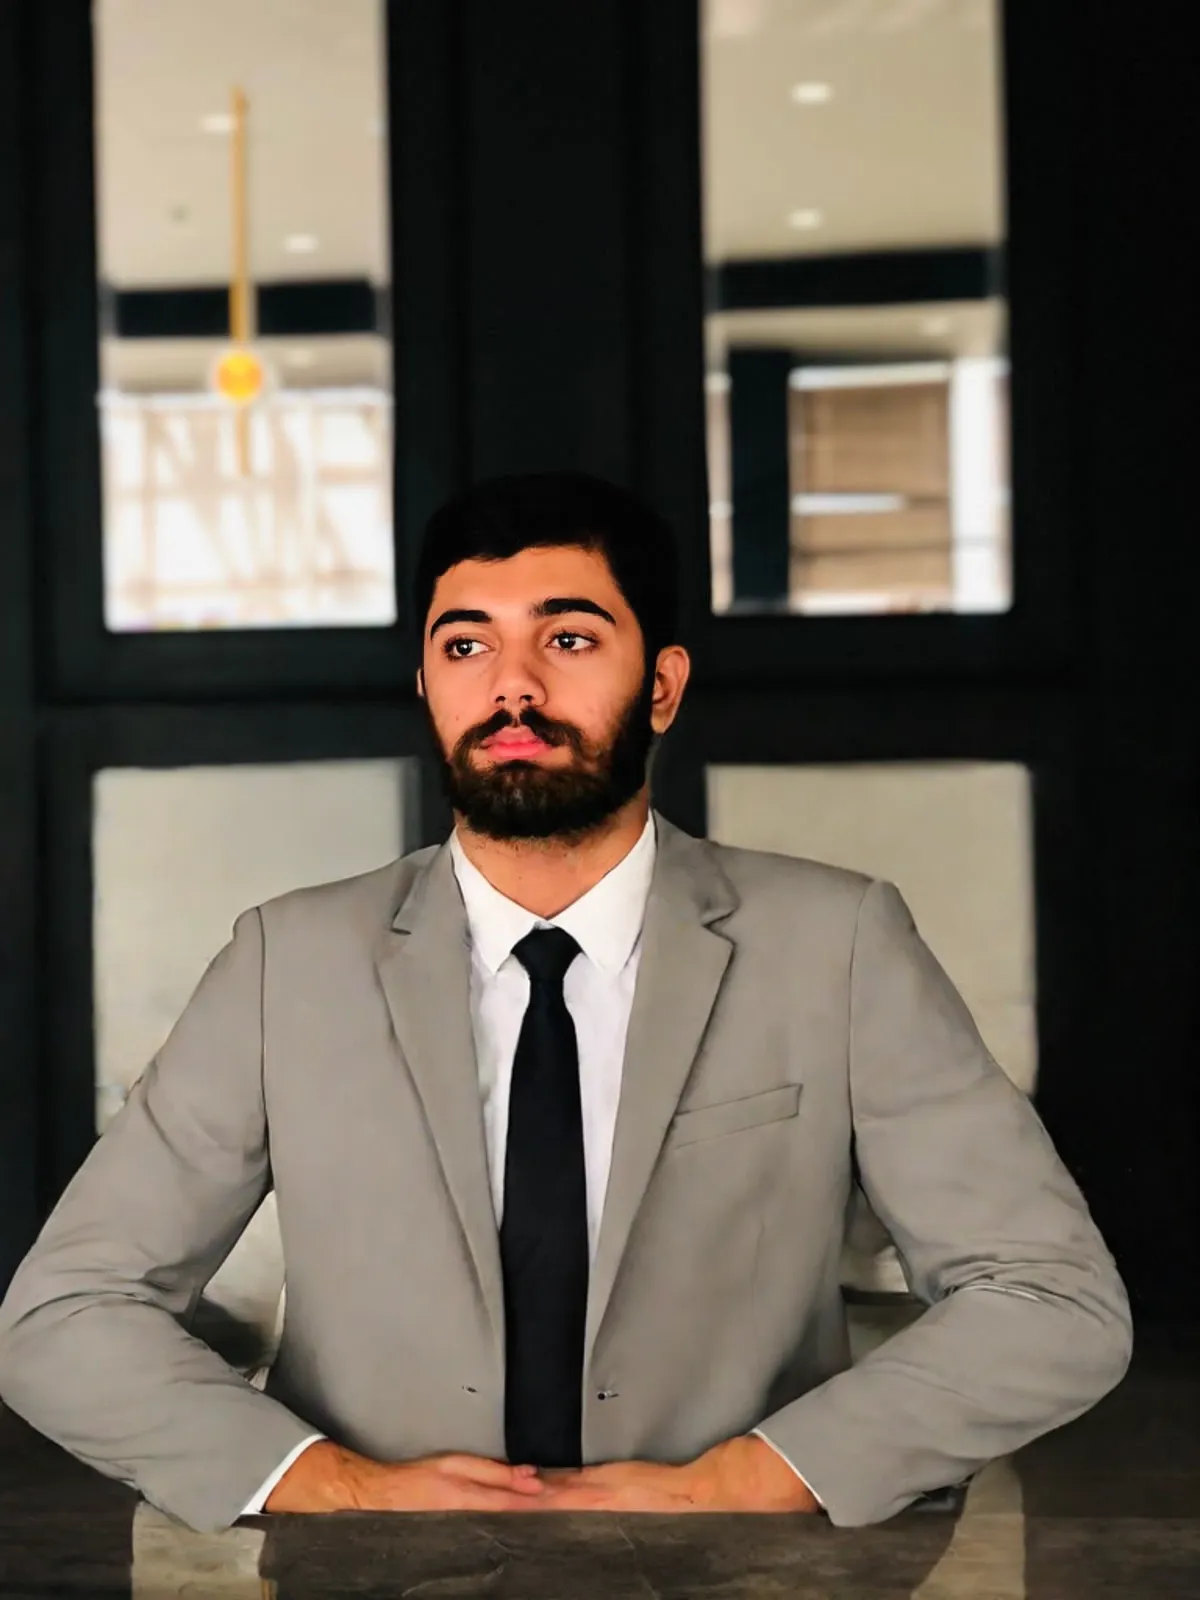

Uploaded Image


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image...


  0%|          | 0/20 [00:00<?, ?it/s]

Image generated in 4.79 seconds!


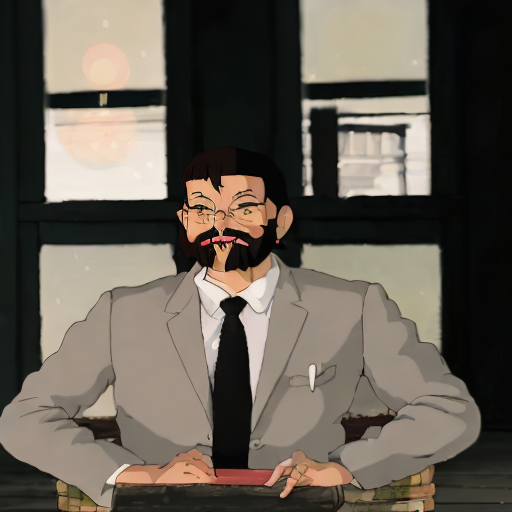

Ghibli-Style Image
Saved as ghibli_output.png


In [10]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
import time
import matplotlib.pyplot as plt
from google.colab import files
import IPython.display as display

# Load the model
def load_model():
    model_id = "nitrosocke/Ghibli-Diffusion"  # Correct model ID
    dtype = torch.float16 if torch.cuda.is_available() else torch.float32
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=dtype)
    pipe.to("cuda" if torch.cuda.is_available() else "cpu")
    pipe.enable_attention_slicing()
    return pipe

# Function to generate the Ghibli-style image
def generate_ghibli_image(image, pipe, strength):
    image = image.convert("RGB")
    image = image.resize((512, 512))  # Resize to 512x512 for better results

    prompt = (
        "A highly detailed Studio Ghibli-style portrait of a person with warm, vibrant colors, "
        "magical atmosphere, soft painterly brushstrokes, and traditional animation feel, "
        "inspired by Hayao Miyazaki."
    )

    print("Generating image...")
    start_time = time.time()
    result = pipe(prompt=prompt, image=image, strength=strength).images[0]
    print(f"Image generated in {time.time() - start_time:.2f} seconds!")
    return result

# File upload using Google Colab
def upload_and_process():
    global files  # Ensure 'files' is recognized as a global module
    uploaded = files.upload()
    if not uploaded:
        print("No file selected.")
        return

    file_name = list(uploaded.keys())[0]
    image = Image.open(file_name)

    # Display the uploaded image
    display.display(image)
    print("Uploaded Image")

    pipe = load_model()
    strength = 0.4  # Adjust strength for better balance
    result_img = generate_ghibli_image(image, pipe, strength)

    # Display the generated image
    display.display(result_img)
    print("Ghibli-Style Image")

    # Save the output
    output_path = "ghibli_output.png"
    result_img.save(output_path)
    print(f"Saved as {output_path}")

# Run the upload and processing function
upload_and_process()